<h1 style="color:#339ACD; font-size:25px; font-weight: bold;">QuarkCircuit: Construction, Visualization, and Transpilation of Quantum Circuits</h1>

<h2 style="color:#339ACD; font-size:25px; font-weight: bold;">Installation</h2>

<div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px; box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.2); font-family: consolas; color: #66BFE7; font-size: 20px;">
    <code>pip install quarkcircuit</code>
</div>


<h2 style="color:#339ACD; font-size:25px; font-weight: bold;">Construct and visualize a quantum circuit</h2>

In [1]:
from quark.circuit import QuantumCircuit

In [2]:
nqubits = 3
qc = QuantumCircuit(nqubits)
qc.h(0)
for i in range(1,nqubits):
    qc.cx(0,i)
qc.barrier()
qc.measure_all()
qc.draw()

<div style="color: #FA8072; font-size:20px;">Note: For better circuit display, please set your chrome or VS Code to a monospaced font, such as "Consolas".</div>

<h2 style="color:#339ACD; font-size:25px; font-weight: bold;">Transpile the quantum circuit to match the attributes of a specific quantum device</h2>

<h3 style="color:#339ACD; font-size:25px; font-weight: bold;">Step1: Load BAQIS superconducting quantum computer</h3>

In [3]:
from quark.circuit import Backend

In [4]:
chip_name = 'Baihua'
chip_backend = Backend(chip_name)

Baihua configuration loading done!
The last calibration time was 2025-03-25 16:32:15


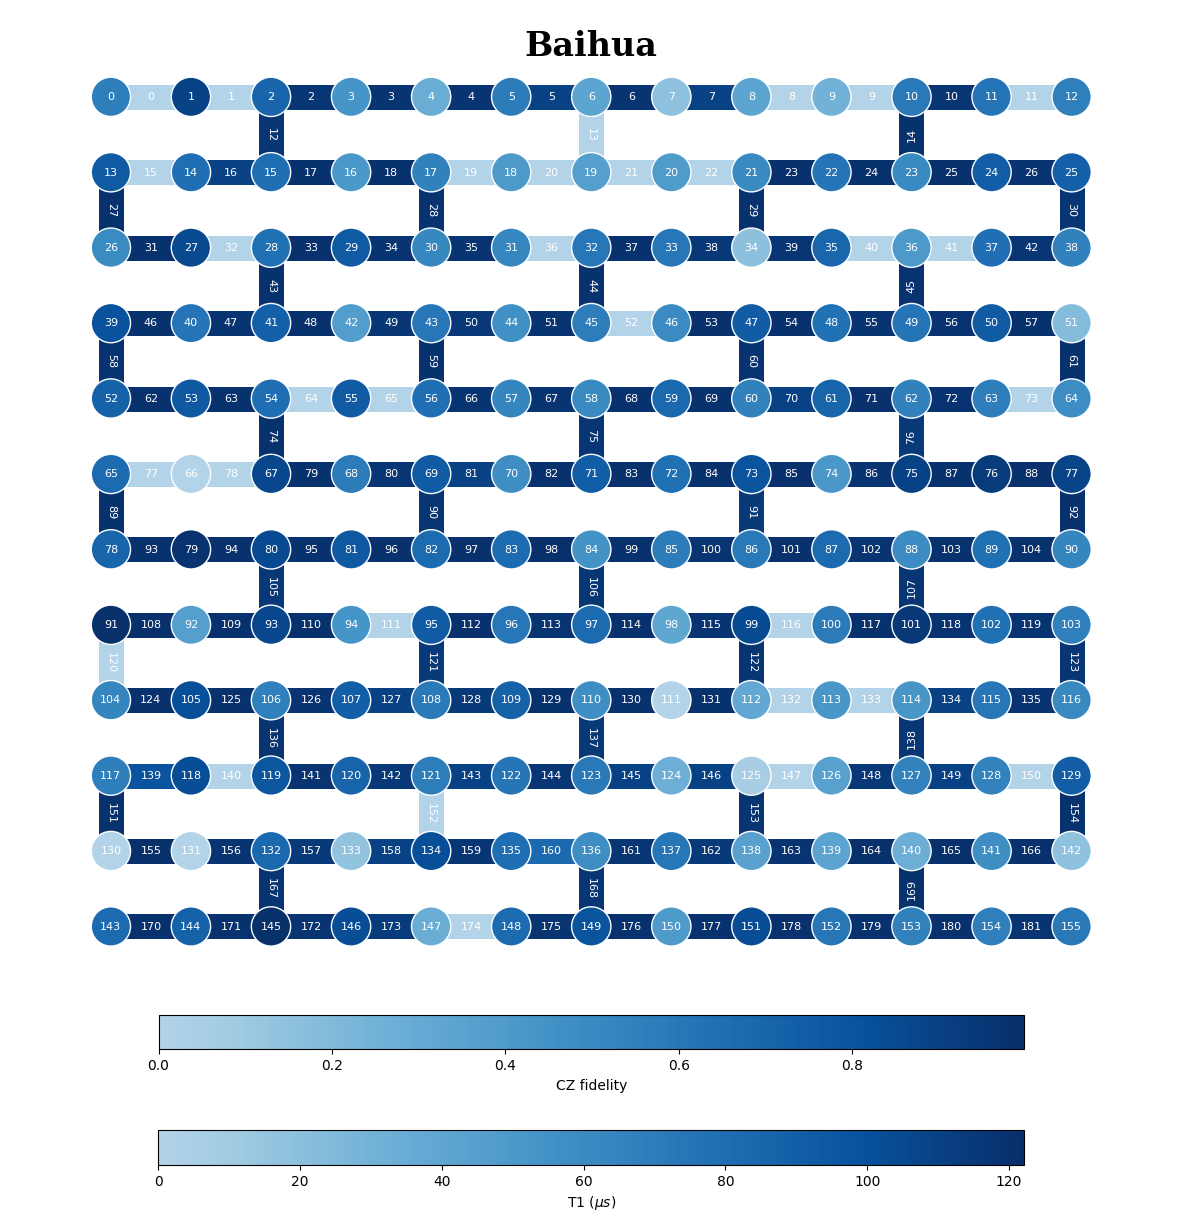

In [7]:
chip_backend.draw(show_couplers_fidelity=True,show_quibts_attributes='T1',save_svg_fname='baihua_chip_fig',show_qubits_index=True,show_couplers_index=True)

<h3 style="color:#339ACD; font-size:25px; font-weight: bold;">Step2: Transpile</h3>

In [8]:
from quark.circuit import Transpiler

In [14]:
# chip backend
qct = Transpiler(chip_backend).run(qc,target_qubits=[],optimize_level=1)
print(qct.depth)
qct.draw_simply()

Physical qubits layout [21, 22, 23] are derived from the chip backend priority qubits, with the corresponding coupling being [(21, 22), (22, 23)].
The average fidelity of the coupler(s) between the selected qubits is 0.987, and the variance of the fidelity is 1.0000000000000019e-06.
   initial mapping    ----->     best mapping      ----->     final mapping    
    P     :    V      ----->     P     :    V      ----->     P     :    V     
    21    :    0      ----->     21    :    1      ----->     21    :    1     
    22    :    1      ----->     22    :    0      ----->     22    :    0     
    23    :    2      ----->     23    :    2      ----->     23    :    2     
Mapping to basic gates done !
5


<h3 style="color:#339ACD; font-size:25px; font-weight: bold;">Step3: Submit the circuit to "Baihua" backend for execution via QuarkStudio</h3>

In [ ]:
from quark import Task
# Log in SQCLab https://quafu-sqc.baqis.ac.cn/login to obtain a token.
yourtoken = '5nCmgtOdsCk8.jZWl8n`8T`KCvNsGObH:dMjnGg``wN/Rg3R{O2R{O15DP3lUO6NEP{dUN7JDd5WnJtJDPxpkO1pUOyBjNx1TNx1TOzBkNjpkJ1GXbjxjJvOnMkGnM{mXdiKHR5i4cimHfjpkJzW3d2Kzf'
tmgr = Task(yourtoken)

In [ ]:
task = {
  'chip': 'Baihua',  # chip name
  'name': 'YourFirstQuantumTask',  # task name
  'circuit':qct.to_openqasm2, # the transpiled circuit written in openqasm 2.0
  'compile': False, # No need to execute transpile again.  Pre-transpiling is recommended.
}

# or

#task = {
#  'chip': 'Baihua',  # chip name
#  'name': 'YourFirstQuantumTask',  # task name
#  'circuit':qc.to_openqasm2, # the original circuit written in openqasm 2.0
#  'compile': True, # The server will default to utilizing quarkcircuit for circuit validation and compilation.
#  'options':{'target_qubits':[46,47,48]}
#}

In [184]:
tid = tmgr.run(task, repeat=10) # shots = repeat*1024
print(tid) # tid refers to task id

2503251623276948015


In [ ]:
res = tmgr.result(tid)
res

{'count': {'000': 4305,
  '011': 649,
  '111': 4210,
  '100': 482,
  '001': 111,
  '101': 316,
  '110': 83,
  '010': 84},
 'corrected': {},
 'chip': 'Baihua',
 'circuit': 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[3];\ncreg c[3];\nh q[0];\ncx q[0],q[1];\ncx q[0],q[2];\nbarrier q[0],q[1],q[2];\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\nmeasure q[2] -> c[2];',
 'transpiled': 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[49];\ncreg c[3];\nh q[47];\ncx q[47],q[46];\ncx q[47],q[48];\nbarrier q[47],q[46],q[48];\nmeasure q[47] -> c[0];\nmeasure q[46] -> c[1];\nmeasure q[48] -> c[2];',
 'qlisp': "[(('U', 1.5707963267948966, 0.0, 3.141592653589793), 'Q46'),\n(('U', 1.5707963267948966, 0.0, 3.141592653589793), 'Q47'),\n(('U', 1.5707963267948966, 0.0, 3.141592653589793), 'Q48'),\n('CZ', ('Q47', 'Q46')),\n(('U', 1.5707963267948966, 0.0, 3.141592653589793), 'Q46'),\n('CZ', ('Q47', 'Q48')),\n(('U', 1.5707963267948966, 0.0, 3.141592653589793), 'Q48'),\n('Barrier', ('Q47', 'Q46', 'Q48')),\n(('M

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '000'),
  Text(1, 0, '001'),
  Text(2, 0, '010'),
  Text(3, 0, '011'),
  Text(4, 0, '100'),
  Text(5, 0, '101'),
  Text(6, 0, '110'),
  Text(7, 0, '111')])

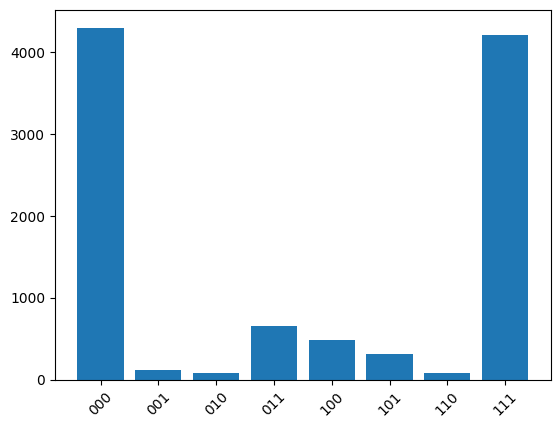

In [205]:
import matplotlib.pyplot as plt
data = res['count']
bases = sorted(data)
count = [data[base] for base in bases]

plt.bar(bases, count)
plt.xticks(rotation=45)